In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [337]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [338]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [339]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [340]:
df.shape

(891, 12)

In [341]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [342]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [343]:
df.value_counts()

PassengerId  Survived  Pclass  Name                                                  Sex     Age   SibSp  Parch  Ticket    Fare      Cabin  Embarked
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)   female  38.0  1      0      PC 17599  71.2833   C85    C           1
572          1         1       Appleton, Mrs. Edward Dale (Charlotte Lamson)         female  53.0  2      0      11769     51.4792   C101   S           1
578          1         1       Silvey, Mrs. William Baird (Alice Munger)             female  39.0  1      0      13507     55.9000   E44    S           1
582          1         1       Thayer, Mrs. John Borland (Marian Longstreth Morris)  female  39.0  1      1      17421     110.8833  C68    C           1
584          0         1       Ross, Mr. John Hugo                                   male    36.0  0      0      13049     40.1250   A10    C           1
                                                                                 

In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [345]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

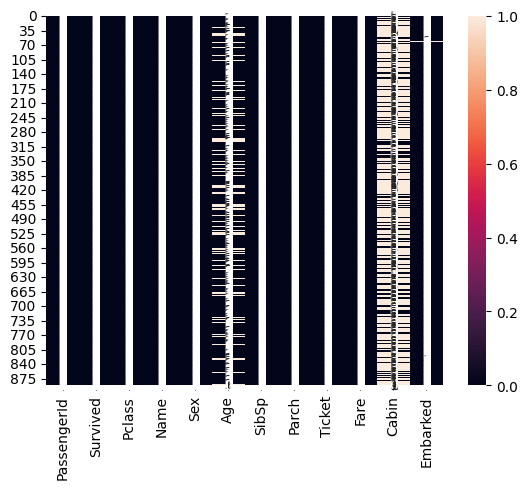

In [346]:
sns.heatmap(df.isnull(),annot=True)

In [347]:
df.drop(columns='Cabin',inplace=True, axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [267]:
df.shape

(891, 11)

In [349]:
df.drop(columns='Age',inplace=True, axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C


In [268]:
df.mean()

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [327]:
df.dropna(subset=['Age'],inplace=True)
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1.0,0.0,3.0,22.0,1.0,0.0,1.935438,1.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,4.146318,0.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,1.99373,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,3.758647,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,2.004158,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,27.0,0.0,0.0,2.351335,1.0,0.0,1.0
887,888.0,1.0,1.0,19.0,0.0,0.0,3.107233,0.0,0.0,1.0
888,889,0,3,<bound method NDFrame._add_numeric_operations....,1.0,1.259921,2.862294,0,0,1
889,890.0,1.0,1.0,26.0,0.0,0.0,3.107233,1.0,0.0,0.0


In [330]:
df.fillna(df['Age'].median,inplace=True,axis=1)


In [331]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
male           0
Q              0
S              0
dtype: int64

<Axes: >

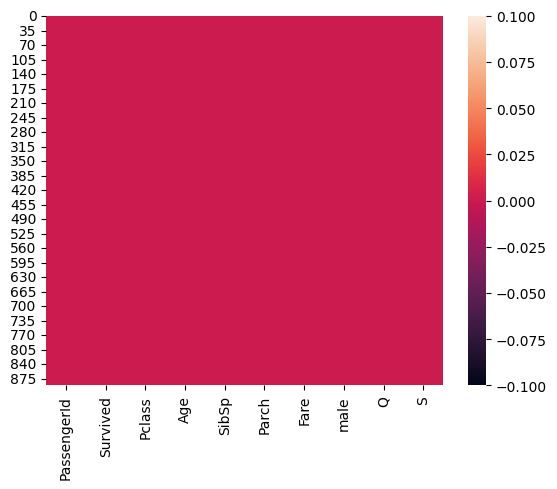

In [332]:
sns.heatmap(df.isnull())

In [272]:
df.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000,512.329200


In [273]:
df.corr()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,0.083081,0.018443,-0.549500
SibSp,-0.057527,-0.035322,0.083081,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.159651,0.216225,1.000000


<Axes: >

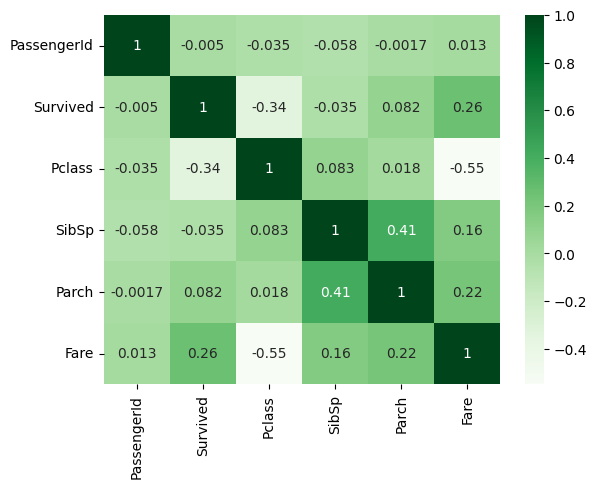

In [274]:
sns.heatmap(df.corr(),cmap='Greens',annot=True)

In [275]:
df.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

In [276]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [277]:
df['SibSp'] = np.cbrt(df['SibSp'])

In [278]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
SibSp          1.033059
Parch          2.749117
Fare           4.787317
dtype: float64

In [279]:
df['SibSp'] = np.cbrt(df['SibSp'])
df['Parch'] = np.cbrt(df['Parch'])
df['Fare'] = np.cbrt(df['Fare'])

In [280]:
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
SibSp          0.805580
Parch          1.348334
Fare           1.230382
dtype: float64

In [281]:
df['Age'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0                                                   22.0
1                                                   38.0
2                                                   26.0
3                                                   35.0
4                                                   35.0
                             ...                        
886                                                 27.0
887                                                 19.0
888    <bound method NDFrame._add_numeric_operations....
889                                                 26.0
890                                                 32.0
Name: Age, Length: 891, dtype: object>

In [282]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

0    549
1    342
Name: Survived, dtype: int64


<Axes: xlabel='Survived', ylabel='count'>

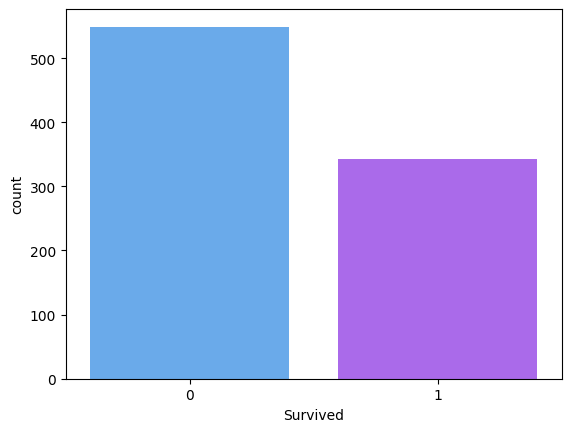

In [283]:
print(df['Survived'].value_counts())
sns.countplot(x=df['Survived'], palette = 'cool')

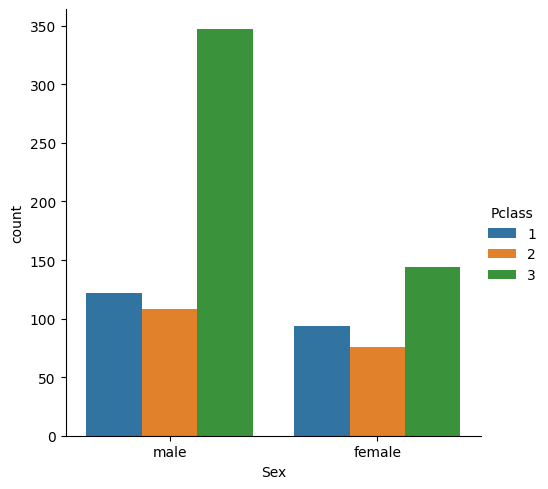

In [284]:
sns.catplot(x="Sex",kind="count",data=df,hue='Pclass') 


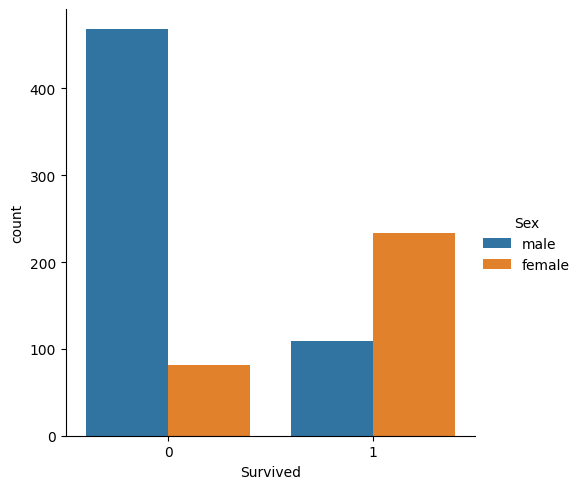

In [285]:
sns.catplot(x="Survived",kind="count",data=df,hue="Sex")


In [286]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64


<Axes: xlabel='Pclass'>

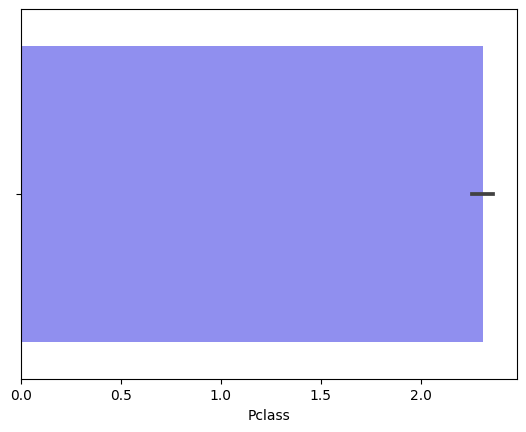

In [287]:
print(df['Pclass'].value_counts())
sns.barplot(x=df['Pclass'],palette='cool')

In [288]:
df.groupby(['Sex','Pclass','Survived'])['Pclass'].count()


Sex     Pclass  Survived
female  1       0             3
                1            91
        2       0             6
                1            70
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: Pclass, dtype: int64

<Axes: xlabel='Pclass'>

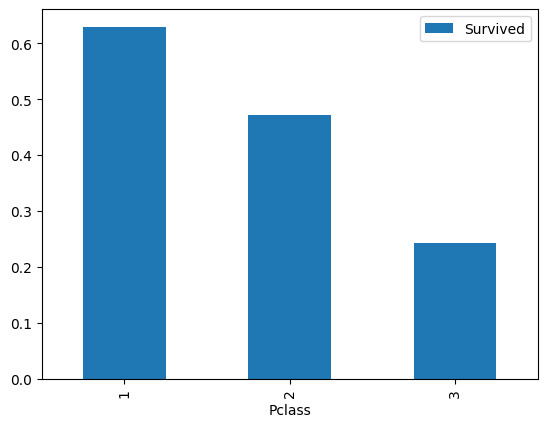

In [289]:
df[['Sex','Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()


<Axes: xlabel='Pclass,Sex'>

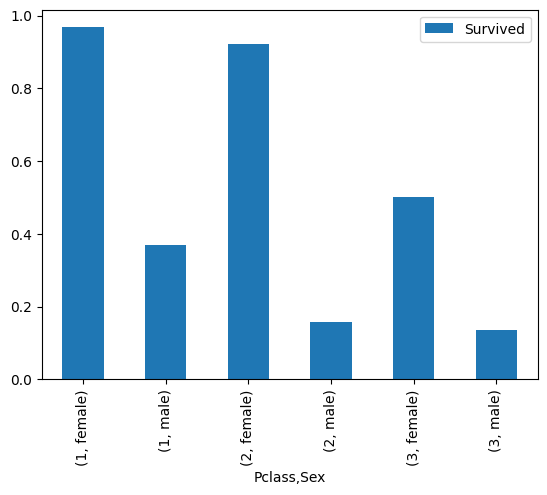

In [290]:
df[['Sex','Pclass','Survived']].groupby(['Pclass','Sex']).mean().plot.bar()


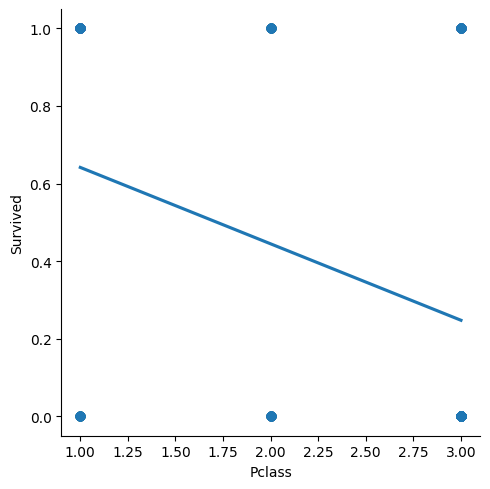

In [291]:
sns.lmplot(x = "Pclass",
            y = "Survived", 
            ci = None,
            data = df)

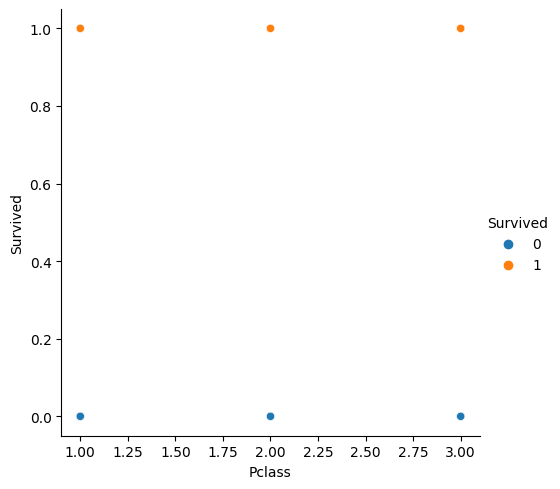

In [292]:
sns.relplot(x ="Pclass", y ="Survived", 
            hue ="Survived", data = df);

<Axes: xlabel='Pclass'>

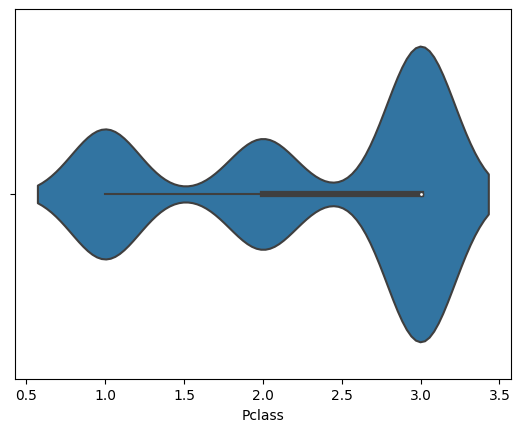

In [293]:
sns.violinplot(x=df["Pclass"])


<Axes: xlabel='Survived'>

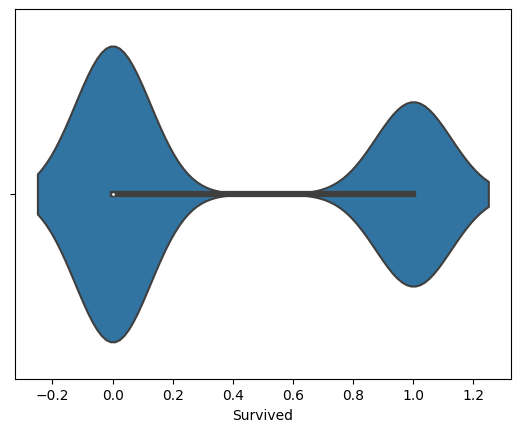

In [294]:
sns.violinplot(x=df["Survived"])


3    491
1    216
2    184
Name: Pclass, dtype: int64


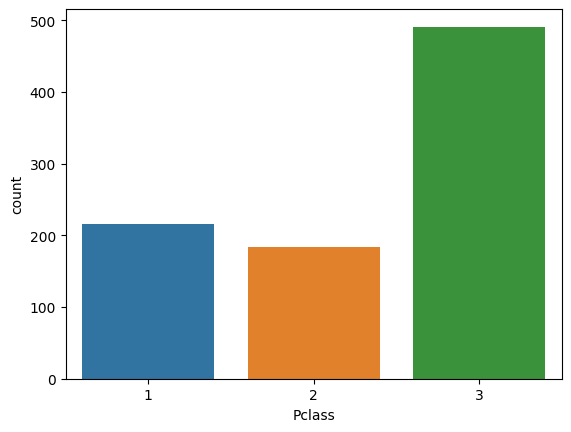

In [295]:
print(df['Pclass'].value_counts())
ax = sns.countplot(x='Pclass', data=df)

<Axes: xlabel='Pclass', ylabel='Survived'>

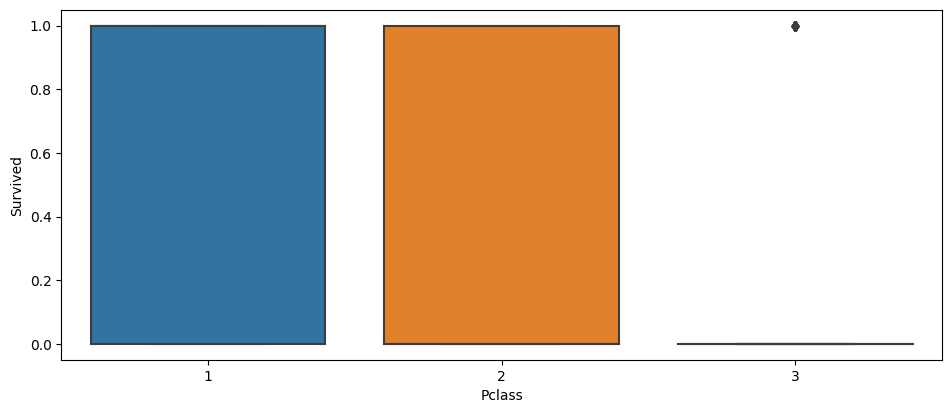

In [296]:
plt.figure (figsize = (25,10))
plt.subplot(2,2,1)
sns.boxplot(x = 'Pclass', y = 'Survived', data = df)


<Axes: >

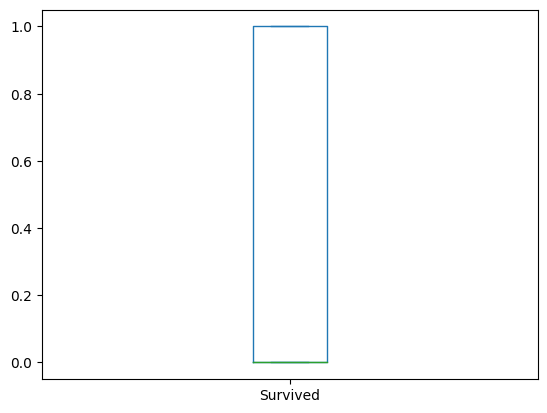

In [297]:
df['Survived'].plot.box()

<Axes: >

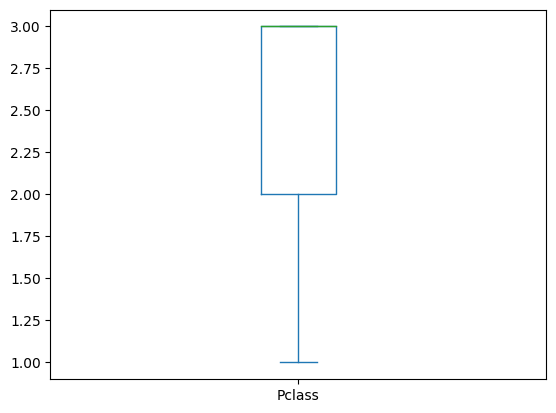

In [298]:
df['Pclass'].plot.box()

<Axes: >

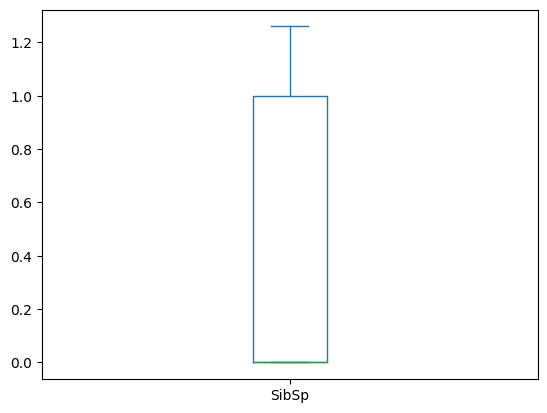

In [299]:
df['SibSp'].plot.box()

<Axes: >

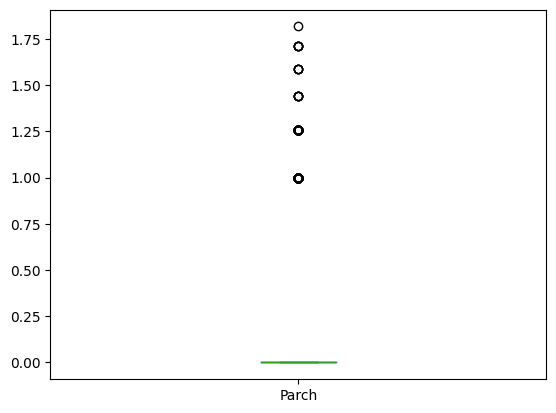

In [300]:
df['Parch'].plot.box()

<Axes: >

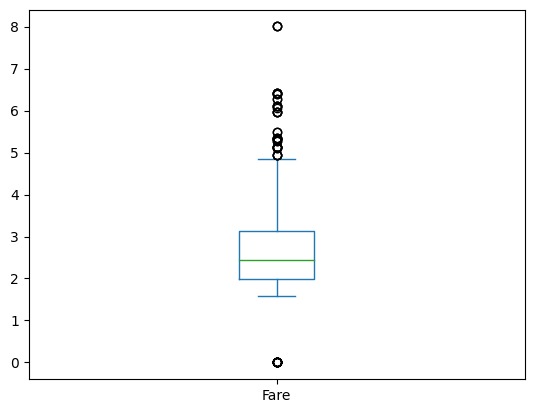

In [301]:
df['Fare'].plot.box()

In [303]:
charges = df['Survived'].groupby(df.Pclass).sum().sort_values(ascending = True)
plt.figure(figsize=(20,5))
ax = sns.barplot(x = Pclass.index, y = Survived)

NameError: name 'Pclass' is not defined

<Figure size 2000x500 with 0 Axes>

PassengerId       Axes(0.125,0.53;0.110714x0.35)
Survived       Axes(0.257857,0.53;0.110714x0.35)
Pclass         Axes(0.390714,0.53;0.110714x0.35)
SibSp          Axes(0.523571,0.53;0.110714x0.35)
Parch          Axes(0.656429,0.53;0.110714x0.35)
Fare           Axes(0.789286,0.53;0.110714x0.35)
dtype: object

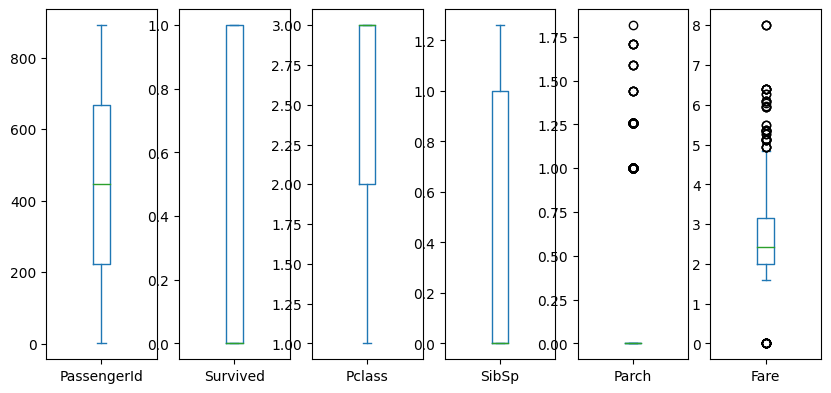

In [304]:
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(10,10))

<Axes: ylabel='Count'>

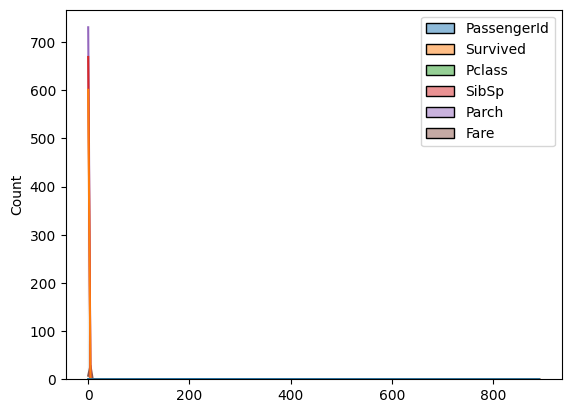

In [305]:
sns.histplot(data=df, kde=True)

<Axes: xlabel='Fare', ylabel='PassengerId'>

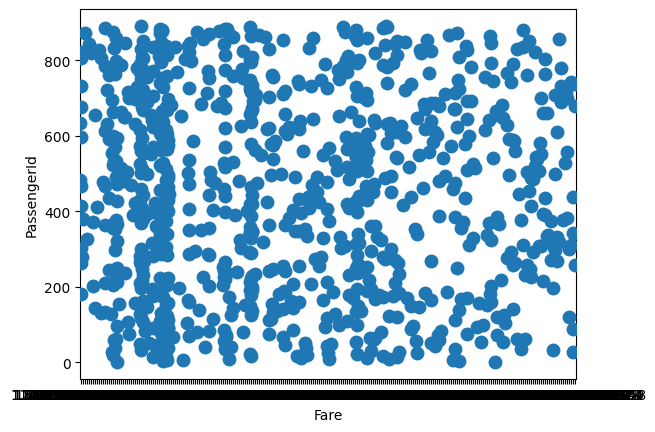

In [306]:
sns.swarmplot(x ="Fare", y = "PassengerId", 
              data = df, size = 10)

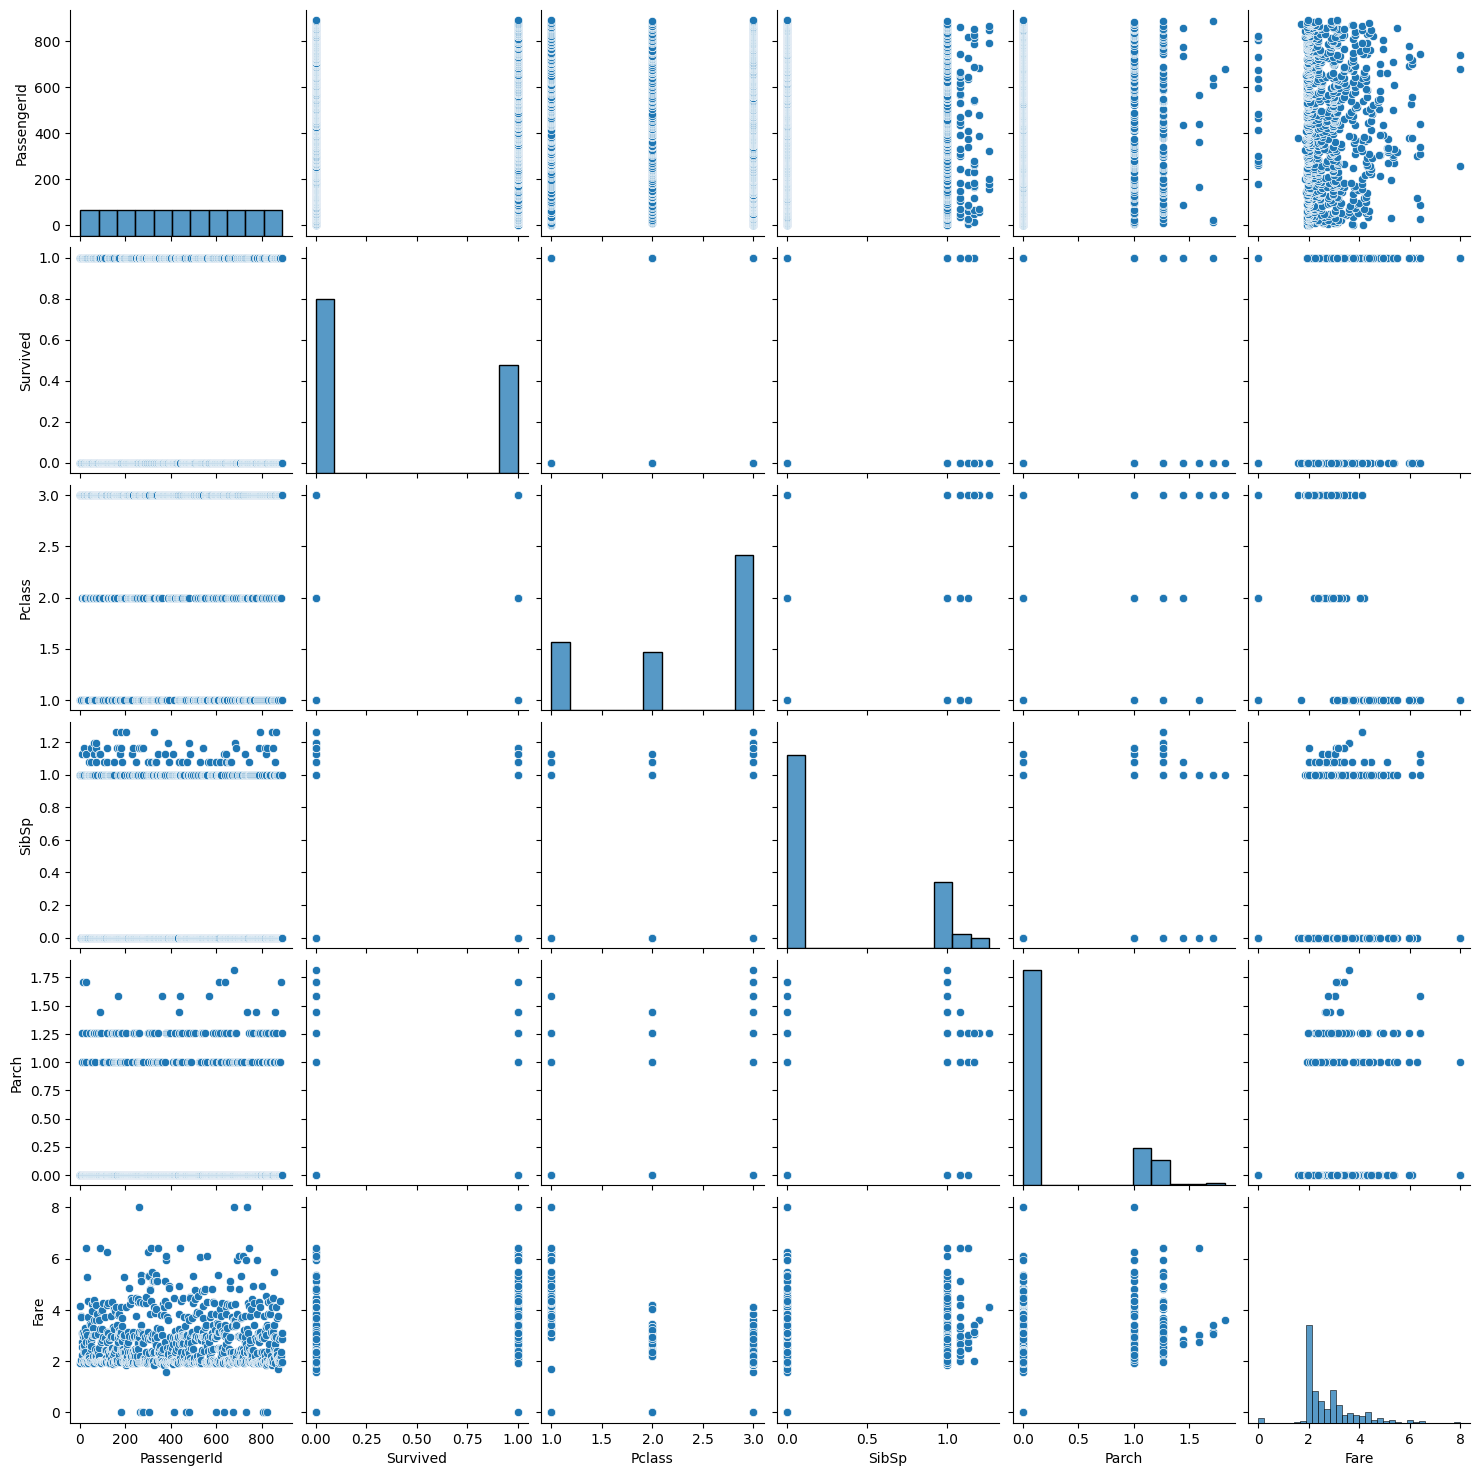

In [307]:
sns.pairplot(df)

In [350]:
sex = pd.get_dummies(df['Sex'], drop_first = True)
embarked = pd.get_dummies(df['Embarked'], drop_first = True)

In [351]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [352]:
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [353]:
df.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)

In [354]:
df

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
0,1,0,3,1,0,7.2500
1,2,1,1,1,0,71.2833
2,3,1,3,0,0,7.9250
3,4,1,1,1,0,53.1000
4,5,0,3,0,0,8.0500
...,...,...,...,...,...,...
886,887,0,2,0,0,13.0000
887,888,1,1,0,0,30.0000
888,889,0,3,1,2,23.4500
889,890,1,1,0,0,30.0000


In [355]:
df = pd.concat([df, sex, embark], axis = 1)
df

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,male,Q,S
0,1,0,3,1,0,7.2500,1,0,1
1,2,1,1,1,0,71.2833,0,0,0
2,3,1,3,0,0,7.9250,0,0,1
3,4,1,1,1,0,53.1000,0,0,1
4,5,0,3,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,0,13.0000,1,0,1
887,888,1,1,0,0,30.0000,0,0,1
888,889,0,3,1,2,23.4500,0,0,1
889,890,1,1,0,0,30.0000,1,0,0


In [356]:
Y = df['Survived']
X = df.drop(['Survived'], axis=1) 

In [357]:
X

,PassengerId,Pclass,SibSp,Parch,Fare,male,Q,S
0,1,3,1,0,7.2500,1,0,1
1,2,1,1,0,71.2833,0,0,0
2,3,3,0,0,7.9250,0,0,1
3,4,1,1,0,53.1000,0,0,1
4,5,3,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,887,2,0,0,13.0000,1,0,1
887,888,1,0,0,30.0000,0,0,1
888,889,3,1,2,23.4500,0,0,1
889,890,1,0,0,30.0000,1,0,0


In [358]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [393]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 110)

In [394]:
lg = LogisticRegression()

In [395]:
lg.fit(X_train, Y_train)

LogisticRegression()

In [396]:
predictions = lg.predict(X_test)

In [397]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       102
           1       0.85      0.71      0.77        77

    accuracy                           0.82       179
   macro avg       0.83      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [398]:
print(confusion_matrix(Y_test, predictions))

[[92 10]
 [22 55]]


In [399]:
print(accuracy_score(Y_test, predictions))

0.8212290502793296


In [400]:
prediction = lg.predict(X)

In [402]:
prediction.shape

(891,)

In [403]:
X.shape

(891, 8)

In [406]:
Final = pd.DataFrame({
    'PassengerId' : X['PassengerId'],
    'Survived' : prediction
})

In [408]:
Final.head(100)

,PassengerId,Survived
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
...,...,...
95,96,0
96,97,0
97,98,0
98,99,1


In [410]:
Final.to_csv('Titanic survival prediction.csv')